In [2]:
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

os.chdir('/Users/matthiasboeker/Desktop/Master_Thesis/Schizophrenia_Depression_Project')
from Modules.time_homo_HMM import *
from Modules.func.support_functions import *

In [3]:
shizophrenia_p, shizophrenia_c = load_data()
#Reshape 
shizophrenia_p = [np.array(X).reshape(len(X), 1) for X in shizophrenia_p]
shizophrenia_c = [np.array(X).reshape(len(X), 1) for X in shizophrenia_c]

In [4]:
th_models_p = []
th_models_c = []
load_in_HMM_models(th_models_p, th_models_c)

In [5]:
log_lik_p = np.array([th_models_p[i].monitor_.history[0] for i in range(0,len(th_models_p))])
log_lik_c = np.array([th_models_c[i].monitor_.history[0] for i in range(0,len(th_models_c))])

## Model Fit 

## Log likelihood

In [6]:
AIC_p = -2*(log_lik_p) + 4
AIC_c = -2*(log_lik_c) + 4
AIC = np.concatenate((AIC_p,AIC_c))



In [7]:
con = np.concatenate((np.ones(len(AIC_p)),np.zeros(len(AIC_c))))
feat_dic = {'log_likelihood':AIC,'condition': con }
hmm_Aic = pd.DataFrame(feat_dic)

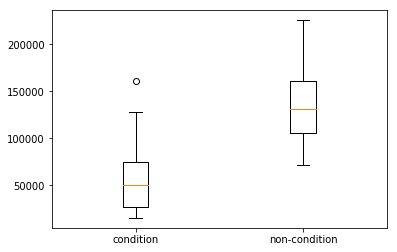

In [8]:
plt.boxplot((hmm_Aic[hmm_Aic.condition == 1]['log_likelihood'],hmm_Aic[hmm_Aic.condition == 0]['log_likelihood']),
            labels =['condition', 'non-condition'])
plt.ylabel = 'Aic'

In [9]:
hidden_states_p = th_models_p[10].predict(shizophrenia_p[10].reshape(-1, 1))
hidden_states_c = th_models_c[10].predict(shizophrenia_c[10].reshape(-1, 1))

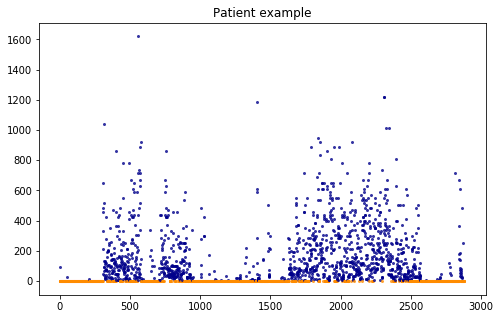

In [13]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x==1 else 'darkblue'for x in hidden_states_p[:2880]]
for x, l, c in zip(range(0,2880), shizophrenia_p[10][:2880], color):
    plt.scatter(x, l, alpha=0.8, c=c,marker='.', linewidths=0.01) 
    plt.title('Patient example')

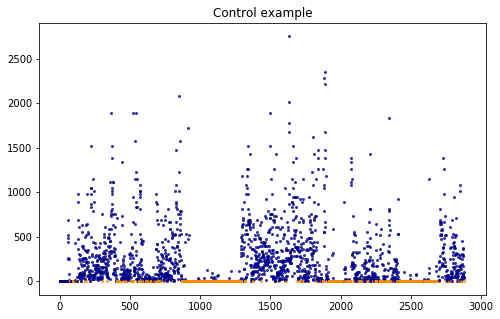

In [14]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x==1 else 'darkblue'for x in hidden_states_c[:2880]]
shape = ['x' if x==1 else '.'for x in hidden_states_c[:2880]]
for x, l, c in zip(range(0,2880), shizophrenia_c[10][:2880], color):
    plt.scatter(x, l, alpha=0.8, c=c,marker='.', linewidths=0.01) 
    plt.title('Control example')

Text(0.5,1,'Control Example')

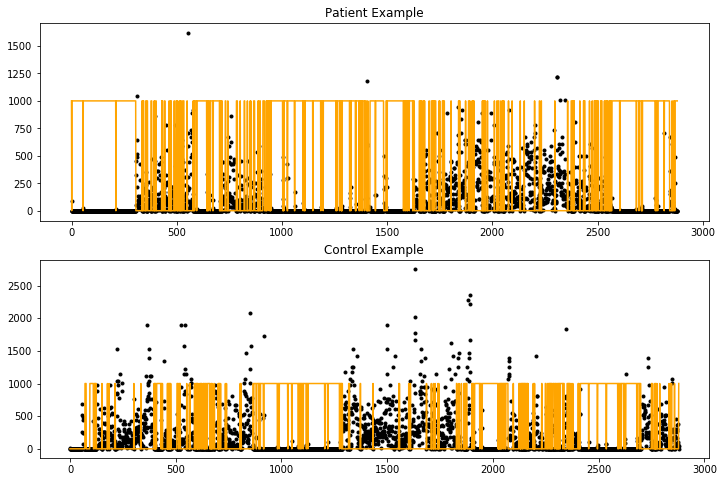

In [18]:
fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(12, 8))
ax0.plot(hidden_states_p[:2880]*1000, color='orange')
ax0.scatter(range(0,2880), shizophrenia_p[10][:2880], marker = '.', color='black')
ax0.set_title('Patient Example')
ax1.scatter(range(0,2880), shizophrenia_c[10][:2880], marker = '.', color='black')
ax1.plot(hidden_states_c[:2880]*1000, color='orange')
ax1.set_title('Control Example')

Text(0.5,1,'Control Example')

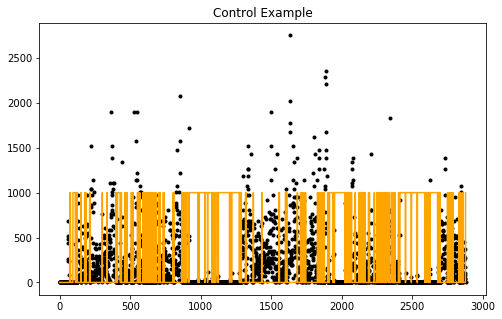

In [16]:
fig = plt.figure(figsize=(8,5))
plt.scatter(range(0,2880), shizophrenia_c[10][:2880], marker = '.', color='black')
plt.plot(hidden_states_c[:2880]*1000, color='orange')
plt.title('Control Example')

## State coefficient features

### Determine resting and active state

In [11]:
rest_state_p = np.array([np.argmin(th_models_p[i].means_) for i in range(0,len(th_models_p))])
rest_state_c = np.array([np.argmin(th_models_c[j].means_) for j in range(0,len(th_models_c))])
active_state_p = np.array([np.argmax(th_models_p[i].means_) for i in range(0,len(th_models_p))])
active_state_c = np.array([np.argmax(th_models_c[j].means_) for j in range(0,len(th_models_c))])

In [12]:
#Patients
pat_mean0 = np.array([th_models_p[j].means_[rest_state_p[j]] for j in range(0,len(th_models_p))])
pat_mean1 = np.array([th_models_p[j].means_[active_state_p[j]] for j in range(0,len(th_models_p))])
pat_cov0 = np.array([th_models_p[j].covars_[rest_state_p[j]] for j in range(0,len(th_models_p))])
pat_cov1 = np.array([th_models_p[j].covars_[active_state_p[j]] for j in range(0,len(th_models_p))])
#Controls
con_mean0 = np.array([th_models_c[i].means_[rest_state_c[i]] for i in range(0,len(th_models_c))])
con_mean1 = np.array([th_models_c[i].means_[active_state_c[i]] for i in range(0,len(th_models_c))])
con_cov0 = np.array([th_models_c[i].covars_[rest_state_c[i]] for i in range(0,len(th_models_c))])
con_cov1 = np.array([th_models_c[i].covars_[active_state_c[i]] for i in range(0,len(th_models_c))])

### Transition probability features

In [13]:
#Patients
pat_transmat_00 = np.array([th_models_p[i].transmat_[rest_state_p[i],rest_state_p[i]] for i in range(0,len(th_models_p))])
pat_transmat_01 = np.array([th_models_p[i].transmat_[rest_state_p[i],active_state_p[i]] for i in range(0,len(th_models_p))])
pat_transmat_10 = np.array([th_models_p[i].transmat_[active_state_p[i],rest_state_p[i]] for i in range(0,len(th_models_p))])
pat_transmat_11 = np.array([th_models_p[i].transmat_[active_state_p[i],active_state_p[i]] for i in range(0,len(th_models_p))])

#Controls
con_transmat_00 = np.array([th_models_c[i].transmat_[rest_state_c[i],rest_state_c[i]] for i in range(0,len(th_models_c))])
con_transmat_01 = np.array([th_models_c[i].transmat_[rest_state_c[i],active_state_c[i]] for i in range(0,len(th_models_c))])
con_transmat_10 = np.array([th_models_c[i].transmat_[active_state_c[i],rest_state_c[i]] for i in range(0,len(th_models_c))])
con_transmat_11 = np.array([th_models_c[i].transmat_[active_state_c[i],active_state_c[i]] for i in range(0,len(th_models_c))])

In [14]:
trans_00 = np.concatenate((pat_transmat_00,con_transmat_00))
trans_01 = np.concatenate((pat_transmat_01,con_transmat_01))
trans_10 = np.concatenate((pat_transmat_10,con_transmat_10))
trans_11 = np.concatenate((pat_transmat_11,con_transmat_11))
mean_0 = np.squeeze(np.concatenate((pat_mean0,con_mean0)))
mean_1 = np.squeeze(np.concatenate((pat_mean1,con_mean1)))
cov_0 = np.squeeze(np.concatenate((pat_cov0,con_cov0)))
cov_1 = np.squeeze(np.concatenate((pat_cov1,con_cov1)))
con = np.concatenate((np.ones(len(pat_mean0)),np.zeros(len(con_mean0))))
feat_dic = {'mean_0': mean_0, 'mean_1': mean_1, 'cov_0': cov_0, 'cov_1': cov_1,
            'trans_00':trans_00,'trans_01':trans_01,'trans_10':trans_10,'trans_11':trans_11,'condition': con }
hmm_feat = pd.DataFrame(feat_dic)

## State 1 components

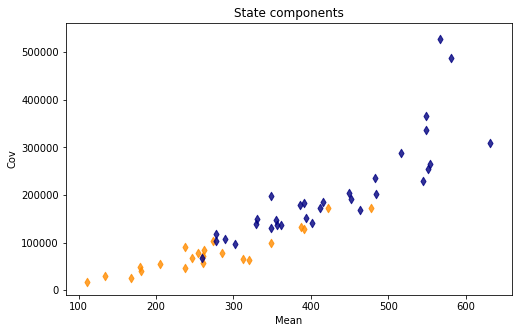

In [15]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in hmm_feat['condition']]
shape = ['d' if k>0 else 'd' for k in hmm_feat['condition']]
for x, l, c, m in zip( hmm_feat['mean_1'],  hmm_feat['cov_1'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('Mean')
    plt.ylabel('Cov')
    plt.title('State components')

## Transition probabilities 

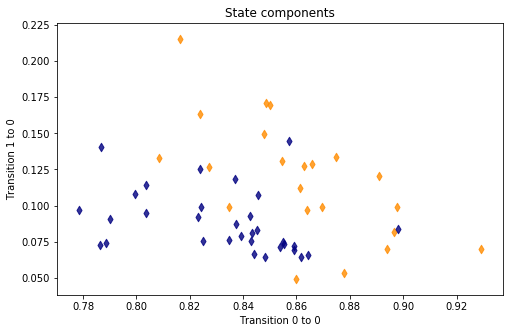

In [16]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in hmm_feat['condition']]
shape = ['d' if k>0 else 'd' for k in hmm_feat['condition']]
for x, l, c, m in zip( hmm_feat['trans_00'],  hmm_feat['trans_10'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('Transition 0 to 0')
    plt.ylabel('Transition 1 to 0')
    plt.title('State components')

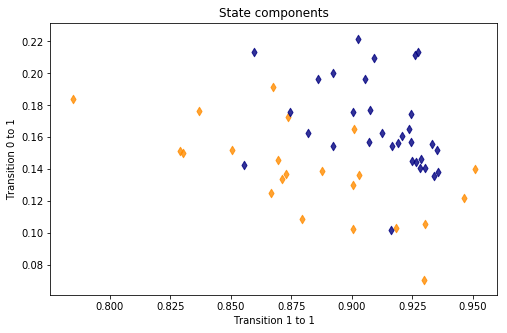

In [17]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in hmm_feat['condition']]
shape = ['d' if k>0 else 'd' for k in hmm_feat['condition']]
for x, l, c, m in zip( hmm_feat['trans_11'],  hmm_feat['trans_01'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('Transition 1 to 1')
    plt.ylabel('Transition 0 to 1')
    plt.title('State components')

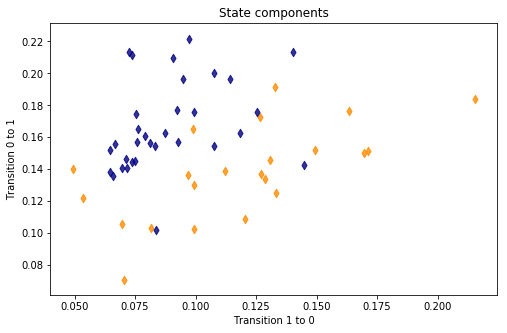

In [18]:
fig = plt.figure(figsize=(8,5))
color = ['darkorange' if x>0 else 'navy' for x in hmm_feat['condition']]
shape = ['d' if k>0 else 'd' for k in hmm_feat['condition']]
for x, l, c, m in zip( hmm_feat['trans_10'],  hmm_feat['trans_01'], color, shape):
    plt.scatter(x, l, alpha=0.8, c=c,marker=m)  
    plt.xlabel('Transition 1 to 0')
    plt.ylabel('Transition 0 to 1')
    plt.title('State components')

In [19]:
char00 = np.empty(shape=(len(trans_00),), dtype='<U5')
char01 = np.empty(shape=(len(trans_01),), dtype='<U5')
char10 = np.empty(shape=(len(trans_10),), dtype='<U5')
char11 = np.empty(shape=(len(trans_11),), dtype='<U5')
con = np.tile(np.concatenate((np.ones(len(pat_mean0)),np.zeros(len(con_mean0)))), 4)
labels = np.empty(shape=(len(con),), dtype='<U5')
labels[np.where(con==0)] = 'Control'
labels[np.where(con==1)] = 'Patient'
char00[:] = '0,0'
char01[:] = '0,1'
char10[:] = '1,0'
char11[:] = '1,1'
chars = np.squeeze(np.concatenate((char00,char01,char10,char11)))
probs = np.concatenate((trans_00,trans_01,trans_10,trans_11))
dic_ = {'Probability': probs, 'Transitions': chars, 'Condition': labels }
plot_data = pd.DataFrame(dic_)


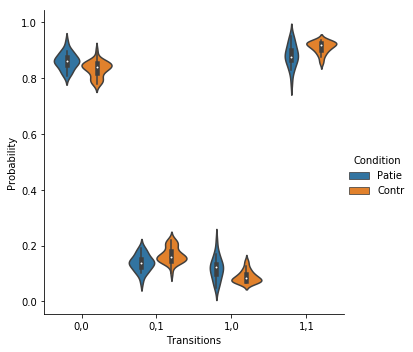

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Transitions", y="Probability",kind="violin",hue="Condition", data=plot_data)

# Classification 

### Correlation Matrix

In [ ]:
import seaborn as sns
X = hmm_feat.drop(['condition',], axis=1)
y = hmm_feat['condition']
corr = X.corr()
#fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap="rocket")

Transition probability 11 and 00 has to be taken out

## Logistic Regression with L1 Reg

In [ ]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix , matthews_corrcoef

X = hmm_feat.drop(['condition','trans_00', 'trans_11'], axis=1)
y = hmm_feat['condition']
#Standardize the data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

class_weight = 'balanced'
penalty = 'l1'
C= [50,10, 5, 1, 0.8, 0.5, 0.3, 0.1, 0.08, 0.05, 0.03, 0.01]
n_jobs =1
solver='liblinear'
coefs = []
areaUnderROC = []
average_precision = []
matthews = []
for c in C: 
    logReg = LogisticRegression(C=c,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs,fit_intercept=True )

    trainingScores = []
    cvScores = []
    
    predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

    for train_index, test_index in k_fold.split(X_train,y_train):
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

        logReg.fit(X_train_fold, y_train_fold)
        loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

        trainingScores.append(loglossTraining)

        predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
        loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
        cvScores.append(loglossCV)
        
        preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
        preds.columns = ['trueLabel','prediction']
        predictionsBasedOnKFoldsLogisticRegression = preds.copy()
    fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
    average_precision.append(average_precision_score(preds['trueLabel'],
                                            preds['prediction']))
    areaUnderROC.append(auc(fpr, tpr))
    coefs.append(logReg.coef_)
    
    
coefs = pd.DataFrame(np.squeeze(np.asarray(coefs)), columns = X.columns)  
coefs['C'] = C

res = np.concatenate((np.array(areaUnderROC,ndmin=2),np.array(average_precision,ndmin=2)),axis=0)
res = res.reshape(12,2)
pred_res = pd.DataFrame(res, columns = ['AUC', 'Avg_Precision']) 

### L1 Regularization Plot Coefficients 


In [ ]:
fig = plt.figure()
plt.plot(pred_res['AUC'], ls='-.', color='blue')
plt.plot(pred_res['Avg_Precision'], ls='--',color='darkgreen' )
plt.xticks(range(0,len(C)),C)
plt.xlim(1.0)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Predicition Score')
print('Max AUC at C: ',C[np.argmax(pred_res['AUC'][4:])])
print('AUC',np.max(pred_res['AUC']))
print('Max Average Precision at C: ',C[np.argmax(pred_res['Avg_Precision'][4:])])
print('Max Average Precision',np.max(pred_res['Avg_Precision']))

In [ ]:
pred_res['Avg_Precision'][4:]

In [ ]:
pred_res

In [ ]:
coefs_plot = coefs.drop(['C'], axis=1)
coefs_plot.plot()                 
plt.xticks(range(0,len(C)),C)
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

In [ ]:
zoom = coefs.iloc[5:,:].reset_index(drop=True)
zoom.plot()
plt.xticks(range(0,len(C[5:])),C[5:])
plt.legend(title='', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('C parameter')
plt.ylabel('Coefficient value')

### Log Regression with Statsmodels

### Single feature models 

In [ ]:
from statsmodels.discrete.discrete_model import Logit
from sklearn.preprocessing import StandardScaler

from statsmodels import tools
features = hmm_feat.drop(['condition', 'trans_11', 'trans_00','cov_0'], axis=1)
names = features.columns
y = hmm_feat['condition']
for feat in names:
    print(feat)
    X = features[[feat]]
    #Standardize the data 
    scaler = StandardScaler()
    X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X_std)
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())


### Two feature models 


In [ ]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels import tools
features = hmm_feat.drop(['condition', 'trans_11', 'trans_00', 'mean_0', 'cov_0'], axis=1)
names = features.columns.drop(['cov_1'])
y = hmm_feat['condition']
for feat in names:
    print(feat)
    X = features[['cov_1',feat]]
    #Standardize the data 
    scaler = StandardScaler()
    X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X_std)
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())


### Three variables model

In [ ]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels import tools
features = hmm_feat.drop(['condition', 'trans_11', 'trans_00', 'mean_0', 'cov_0'], axis=1)
names = features.columns.drop(['cov_1','trans_01'])
y = hmm_feat['condition']
for feat in names:
    print(feat)
    X = features[['cov_1','trans_01',feat]]
    #Standardize the data 
    scaler = StandardScaler()
    X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
    dat = tools.add_constant(X_std)
    log_reg = Logit(y, dat).fit()
    print(log_reg.summary())

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = hmm_feat[['cov_1', 'trans_01', 'trans_10']]
#X = hmm_feat[['trans_01','mean_1', 'trans_10']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = hmm_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = hmm_feat[['cov_1', 'trans_01', 'mean_1']]

scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = hmm_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.1,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=133,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Overall performance

Confusion matrix:
[[12  2]
 [ 3 10]]
Matthews Corr Coef:  0.6298438669252061


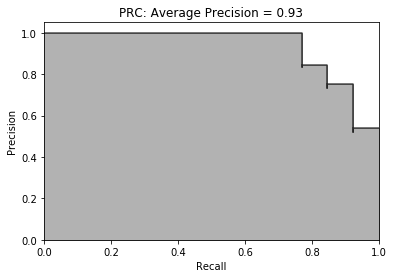

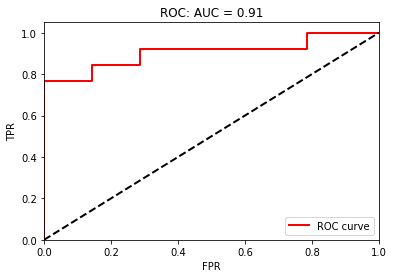

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, matthews_corrcoef
X = hmm_feat.drop(['condition', 'trans_00', 'trans_11'], axis=1)
X = hmm_feat[['trans_01','mean_1', 'trans_10']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns= X.columns.values)
y = hmm_feat['condition']

X_train,  X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.5,random_state=0,  shuffle=True)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)


# Logisitc Regression
class_weight = 'balanced'
penalty = 'l1'
C=1
n_jobs =1
solver='liblinear'
logReg = LogisticRegression(C=C,random_state=19,penalty = penalty, solver=solver, n_jobs=n_jobs, fit_intercept=True )

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1])

for train_index, test_index in k_fold.split(X_train,y_train):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[test_index]

    logReg.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold,logReg.predict_proba(X_train_fold)[:,1])
    

    trainingScores.append(loglossTraining)
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = logReg.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)



preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()


precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])


average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
print('Confusion matrix:')
print(confusion_matrix(preds['trueLabel'],preds['prediction'].astype(np.double).round()))
print('Matthews Corr Coef: ',matthews_corrcoef(preds['trueLabel'],preds['prediction'].astype(np.double).round()))


plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC: AUC = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Precision: 0.8256817035434615
Recall: 0.6676923076923077
Matthews Corr Coef:  0.7337993857053428
Average Precision Test: 0.6923076923076923


Text(0.5,1,'PRC: Average Precision Test = 0.69')

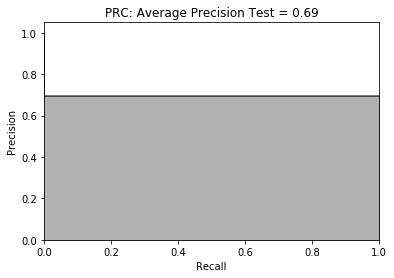

In [24]:
print('Precision:', np.mean(precision))
print('Recall:', np.mean(recall))

confusion_matrix(y_test, logReg.predict(X_test))
print('Matthews Corr Coef: ',matthews_corrcoef(y_test,logReg.predict(X_test).astype(np.double).round()))
average_precision = average_precision_score(y_test,logReg.predict(X_test))


print('Average Precision Test:',average_precision )
precision, recall, thresholds = precision_recall_curve(y_test,logReg.predict(X_test))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('PRC: Average Precision Test = {0:0.2f}'.format(
          average_precision))
